In [1]:
import math
from scipy import signal
from PIL import Image
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from pylab import *
import cv2
import random


In [10]:
def LukasKanade_OpticalFlow(Image1,Image2):
    Image1 = np.array(I1)
    Image2 = np.array(I2)
    S = np.shape(I1)

    #3x3 Gaussian filte to eliminate any noise
    Image1_smooth = cv2.GaussianBlur(Image1,(3,3),0)
    Image2_smooth = cv2.GaussianBlur(Image2, (3,3), 0)


    Ix = signal.convolve2d(Image1_smooth,[[-0.25,0.25],[-0.25,0.25]],'same') + signal.convolve2d(Image2_smooth,[[-0.25,0.25],[-0.25,0.25]],'same')
    
    Iy = signal.convolve2d(Image1_smooth,[[-0.25,-0.25],[0.25,0.25]],'same') + signal.convolve2d(Image2_smooth,[[-0.25,-0.25],[0.25,0.25]],'same')
    
    It = signal.convolve2d(Image1_smooth,[[0.25,0.25],[0.25,0.25]],'same') + signal.convolve2d(Image2_smooth,[[-0.25,-0.25],[-0.25,-0.25]],'same')

    # finding the good features
    features = cv2.goodFeaturesToTrack(Image1_smooth,10000,0.01,10)

    feature = np.int0(features)
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(1,3,1)
    plt.title('Frame 1')
    plt.imshow(Image1_smooth, cmap = cm.gray)
    plt.subplot(1,3,2)
    plt.title('Frame 2')
    plt.imshow(Image2_smooth, cmap = cm.gray)
    for i in feature:
                
        x,y = i.ravel()
        cv2.circle(Image1_smooth,(x,y),3,0,-1)

    
    u = v = np.nan*np.ones(S)

    
    for l in feature:
        
        j,i = l.ravel()
       
        IX = ([Ix[i-1,j-1],Ix[i,j-1],Ix[i-1,j-1],Ix[i-1,j],Ix[i,j],Ix[i+1,j],Ix[i-1,j+1],Ix[i,j+1],Ix[i+1,j-1]]) #The x-component of the gradient vector
        IY = ([Iy[i-1,j-1],Iy[i,j-1],Iy[i-1,j-1],Iy[i-1,j],Iy[i,j],Iy[i+1,j],Iy[i-1,j+1],Iy[i,j+1],Iy[i+1,j-1]]) #The Y-component of the gradient vector
        IT = ([It[i-1,j-1],It[i,j-1],It[i-1,j-1],It[i-1,j],It[i,j],It[i+1,j],It[i-1,j+1],It[i,j+1],It[i+1,j-1]]) #The XY-component of the gradient vector

       
        LukasKanade = (IX, IY)
        LukasKanade = np.matrix(LukasKanade)
        LukasKanade_T = np.array(np.matrix(LukasKanade))
        LukasKanade = np.array(np.matrix.transpose(LukasKanade)) 

        A1 = np.dot(LukasKanade_T,LukasKanade) 
        A2 = np.linalg.pinv(A1)
        A3 = np.dot(A2,LukasKanade_T)

        (u[i,j],v[i,j]) = np.dot(A3,IT) 

    colors = "bgrcmykw"
    color_index = random.randrange(0,8)
    c=colors[color_index]
    
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(1,3,3)
    plt.title('Vector plot of Optical Flow of good features')
    plt.imshow(Image1,cmap = cm.gray)
    for i in range(S[0]):
        for j in range(S[1]):
            if abs(u[i,j])>t or abs(v[i,j])>t:
                plt.arrow(j,i,v[i,j],u[i,j],head_width = 5, head_length = 5, color = c)

    plt.show()



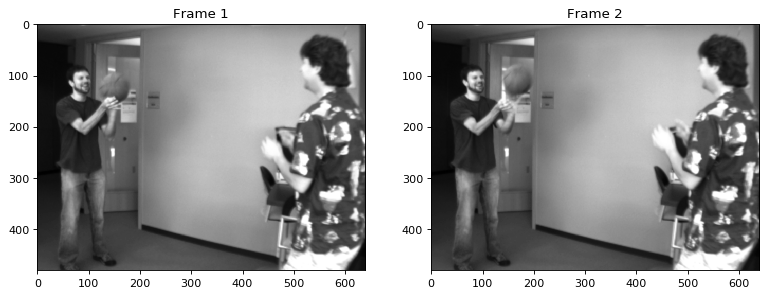

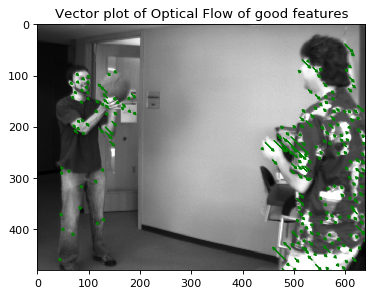

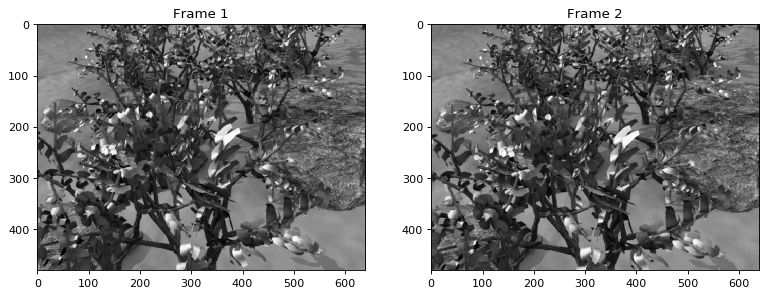

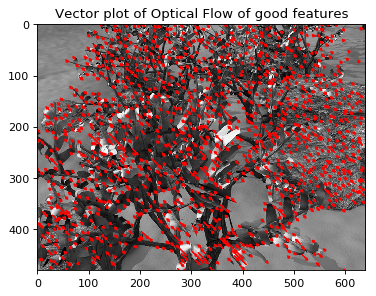

In [11]:
t = 0.3 
I1 = Image.open('/home/srikar/CVPA2/basketball1.png').convert('L')
I2 = Image.open('/home/srikar/CVPA2/basketball2.png').convert('L')
LK_OpticalFlow(Image1, Image2)
I3 = Image.open('/home/srikar/CVPA2/grove1.png').convert('L')
I4 = Image.open('/home/srikar/CVPA2/grove2.png').convert('L')
LucasKanade_OpticalFlow(Image3, Image4)